# Read the tables, we have 1 per model 
# Separate the first n line and the next n and so for each num of labeled samples 
# combine
# write to csv

In [2]:
import pandas as pd 

# Location of the results csv files
baseline_prefix_str = 'baseline_sameWind_1layer_MS4-200/s3l_'
results_prefix_str = 'FP2_SP_sameWind_1layer_unfrozen/s3l_' # FP6_SP_1layer_unfrozen/s3l_'

#results_prefix_str = 'XGB/s3l_'
#results_prefix_str = 'baseline_1layer/s3l_'

#model_list = ['xgb', 'dae_xgb', 'scarf_xgb', 'vime_xgb' ,'subtab_xgb', 'switchtab_xgb']
#model_list = ['3layer_mlp', '4layer_mlp']
model_list = ['dae', 'scarf', 'vime']
#model_list = ['1layer_mse_mlp', '1layer_l1loss_mlp','1layer_smoothl1loss_mlp','1layer_mape_mlp']

#num_samples_list = ['100', '1K', '10K', '20K']
num_samples_list = ['100', '250', '500', '1K', '10K', '20K']

#tasks = ['VR fragment thput.', 'VR burst thput.', 'VR fragment latency', 'VR burst latency', 
#         'UL probe latency', 
#         'DL probe latency'
#        ]
tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
task_str = ["\\textbf{T 1} & ", 
                "\\textbf{T 2} & ", 
                "\\textbf{T 3} & ", 
                "\\textbf{T 4} & ", 
                "\\textbf{T 5} & "
               ]
# Read all the results
results = {}
for model in model_list:
    results_ff = pd.read_csv(results_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    results[model] = {}
    i_start = 0
    for samp in num_samples_list:
        results[model][samp] = results_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)

# Read all the baselines
baseline = {}
for model in model_list:
    baseline_ff = pd.read_csv(baseline_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    baseline[model] = {}
    i_start = 0
    for samp in num_samples_list:
        baseline[model][samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)
        
# For each error metric type 
# for each num of samples 

output_str = ''

for num_samp in num_samples_list:
    output_str = output_str + '\hline' + '\n'
    output_str = output_str + r"\multicolumn{" + str(len(model_list)+1) + r"}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = " + num_samp + r"\rule[-1ex]{0pt}{2.5ex}}\\" + '\n'
    output_str = output_str + '\hline' + '\n'
    #print('\hline')
    #print(r"\multicolumn{"+str(len(model_list)+1)+r"}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = "+num_samp+r"\rule[-1ex]{0pt}{2.5ex}}\\")
    #print('\hline')
    
    # create 3 err metric dataframnes 
    err_r2 = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    err_mape = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    err_mae = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    gains_r2 = pd.DataFrame(index=tasks, columns=model_list).astype(float) 
    
    for model in model_list:
        # add one column at a time 
        err_mae.loc[:, model] = results[model][num_samp].iloc[:,1]
        err_mape.loc[:, model] = results[model][num_samp].iloc[:,2]
        err_r2.loc[:, model] = results[model][num_samp].iloc[:,3]
        gains_r2.loc[:, model] = results[model][num_samp].iloc[:,3] - baseline[model][num_samp].iloc[:,3]

    err_r2 = err_r2.round(3)
    err_mae = err_mae.round(3)
    err_mape = err_mape.round(3)
    gains_r2 = gains_r2.round(3)

    # CHECK HERE !!!!
    # This is a pandas data frame 
    # models are columns, tasks are rows 
    error_metric_to_print = gains_r2
    
    # Convert DataFrame to a LaTeX-friendly format
    latex_table = error_metric_to_print.apply(lambda row: ' & '.join(row.astype(str)), axis=1)
    latex_table = task_str + latex_table + ' \\\\'
    
    # Join the rows with newline characters
    latex_table_str = '\n'.join(latex_table)
    
    output_str = output_str + latex_table_str + '\n'
    #print(latex_table_str)
    
# Print with & as the delimiter to make it each to import into latex 
print(output_str)

\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 100\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.447 & 0.122 & 0.024 \\
\textbf{T 2} & 0.194 & 0.299 & 0.301 \\
\textbf{T 3} & 0.172 & 0.267 & 0.092 \\
\textbf{T 4} & 0.599 & 0.639 & 0.504 \\
\textbf{T 5} & 0.501 & 0.491 & 0.423 \\
\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 250\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.334 & 0.097 & 0.224 \\
\textbf{T 2} & 0.033 & 0.085 & 0.052 \\
\textbf{T 3} & 0.154 & 0.128 & 0.086 \\
\textbf{T 4} & 0.157 & 0.138 & 0.107 \\
\textbf{T 5} & 0.154 & 0.028 & 0.107 \\
\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 500\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.253 & 0.078 & -0.046 \\
\textbf{T 2} & 0.048 & 0.133 & 0.002 \\
\textbf{T 3} & 0.136 & 0.134 & 0.098 \\
\textbf{T 4} & 0.147 & 0.177 & 0.124 \\
\textbf{T 5} & 0.016 & -0.067 & -0.067 \\
\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 1K

# Plot

5


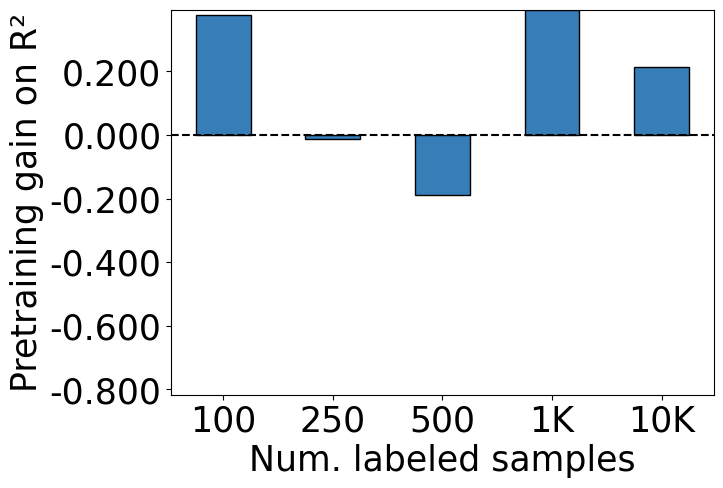

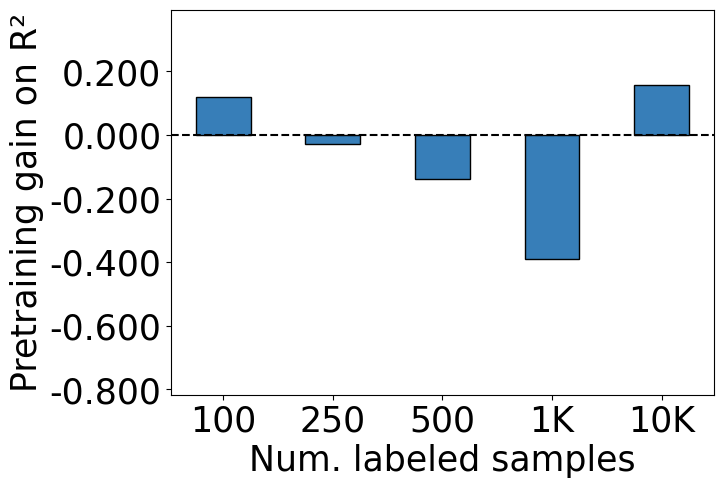

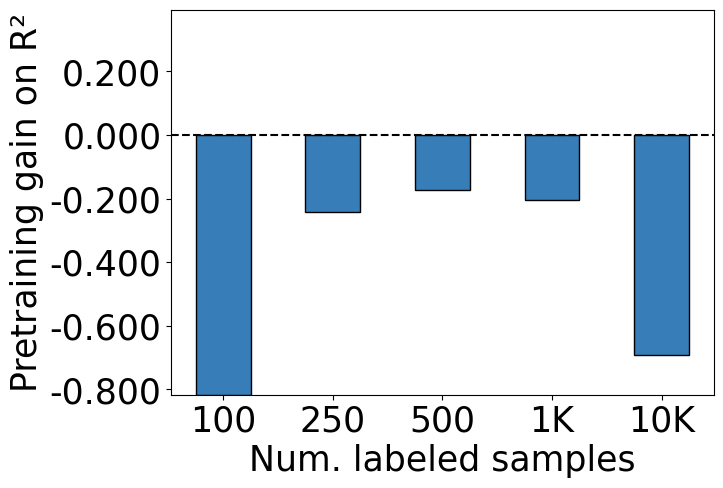

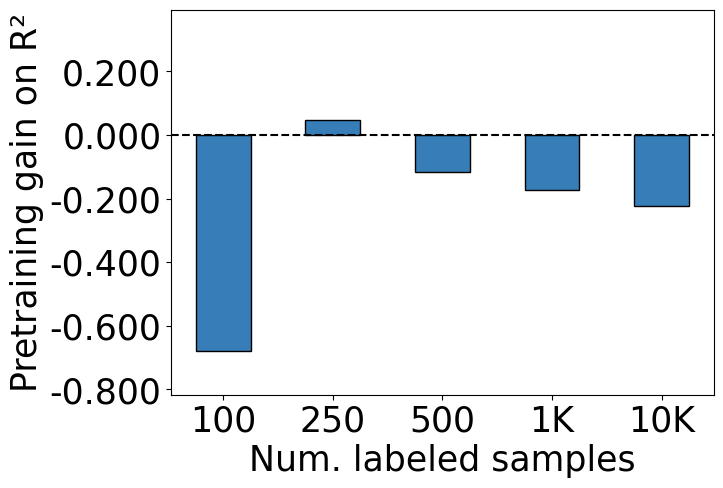

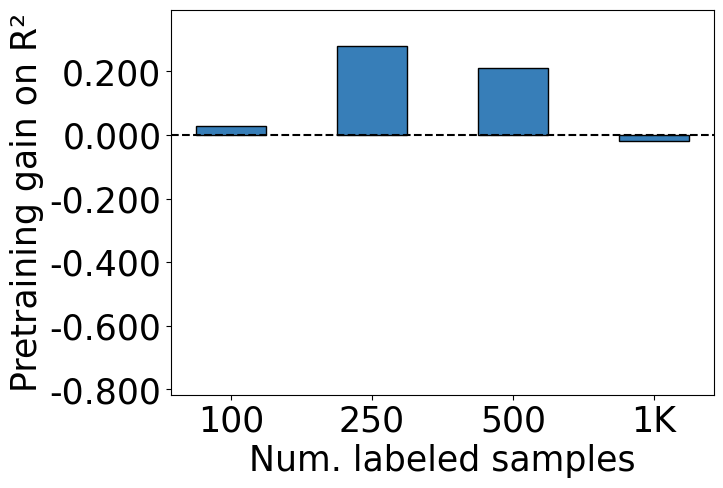

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

color_palate1 = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']
color_palate2 = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'] 

# Location of the results csv files
baseline_prefix_str = 'baseline_1layer_MS4-200/s3l_'
results_prefix_str = 'FP2_SP_1layer_frozen/s3l_'
#plt_str = 'best_baseline_vs_best_pretrainedModel_dae_r2_gainz_PD1_'
plt_str = 'frozen_dae_r2_gainz_PD1_MS4-200_'

model = 'dae'

num_samples_list = ['100', '250', '500', '1K', '10K', '20K']
tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
print(len(tasks))

# Read all the results
results = {}
results_ff = pd.read_csv(results_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
i_start = 0
for samp in num_samples_list:
    results[samp] = results_ff.iloc[i_start:i_start+len(tasks)]
    i_start = i_start + len(tasks)

# Read all the baselines
baseline = {}
baseline_ff = pd.read_csv(baseline_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
i_start = 0
for samp in num_samples_list:
    baseline[samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
    i_start = i_start + len(tasks)
        
gainz_plot_array = np.zeros((len(tasks), len(num_samples_list)))

for n, num_samp in enumerate(num_samples_list):
    
    # create 3 err metric dataframnes 
    err_r2 = arr = np.zeros(len(tasks))
    err_mape = np.zeros(len(tasks))
    err_mae = np.zeros(len(tasks))
    gains_r2 = np.zeros(len(tasks))
    
    err_mae = results[num_samp].iloc[:,1]
    err_mape = results[num_samp].iloc[:,2]
    err_r2 = results[num_samp].iloc[:,3]
    gains_r2 = results[num_samp].iloc[:,3] - baseline[num_samp].iloc[:,3]

    # save this into the finaly plotting array 
    gainz_plot_array[:,n] = gains_r2
    

font_size=25
y_lim = [min(min(row) for row in gainz_plot_array), max(max(row) for row in gainz_plot_array)]
for t, task in enumerate(tasks):
    # Fix the number of decimals in the y-tick labels (2 decimal places in this case)
    plt.figure(figsize=(7, 5))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.bar(num_samples_list, gainz_plot_array[t,:], width=0.5, color=color_palate2[0], edgecolor='black')
    #plt.ylim(bottom=0)
    plt.xlabel('Num. labeled samples', fontsize=font_size)
    plt.ylabel('Pretraining gain on R²', fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim(y_lim)
    plt.axhline(y=0, color='black', linestyle='--')
    #plt.legend(fontsize=font_size)
    plt.savefig('plots/'+plt_str+task+'.pdf', bbox_inches='tight')
    plt.show()

# Stacked bars

baseline_1layer_MS4-200/s3l_ baseline_1layer_MS2-200/s3l_
5
baseline_1layer_MS4-200/s3l_ baseline_1layer_MS4-200/s3l_
5
baseline_1layer_MS4-200/s3l_ baseline_1layer_MS4-300/s3l_
5
baseline_1layer_MS4-200/s3l_ baseline_1layer_MS8-200/s3l_
5
-0.501 0.858


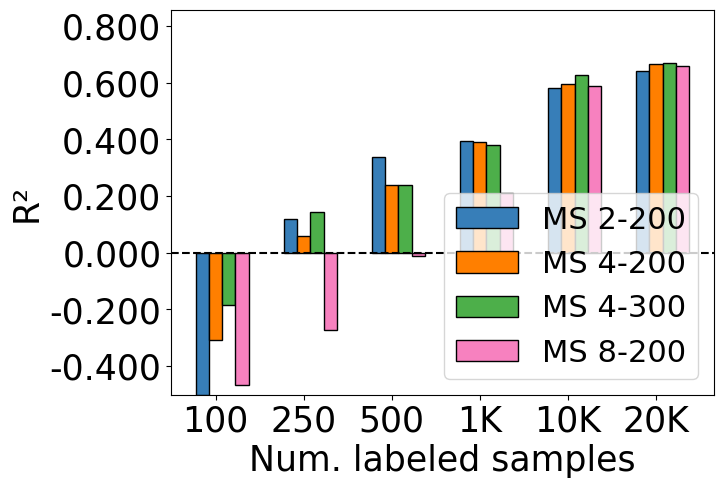

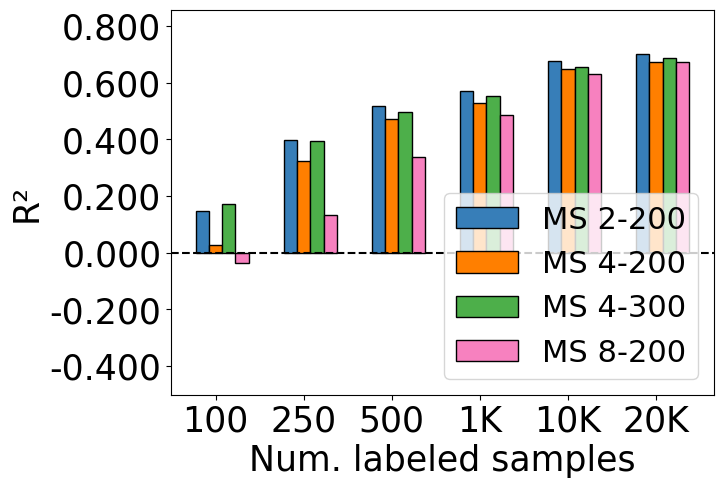

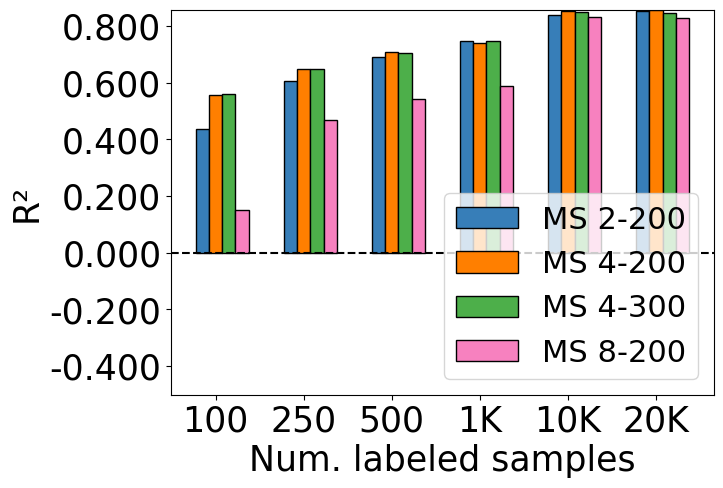

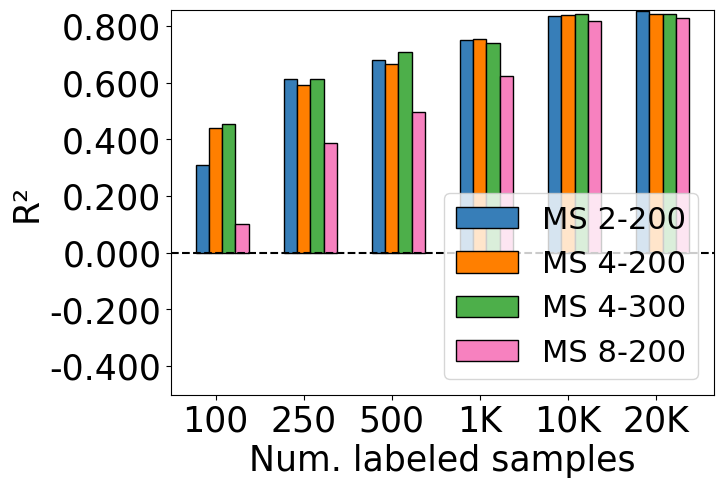

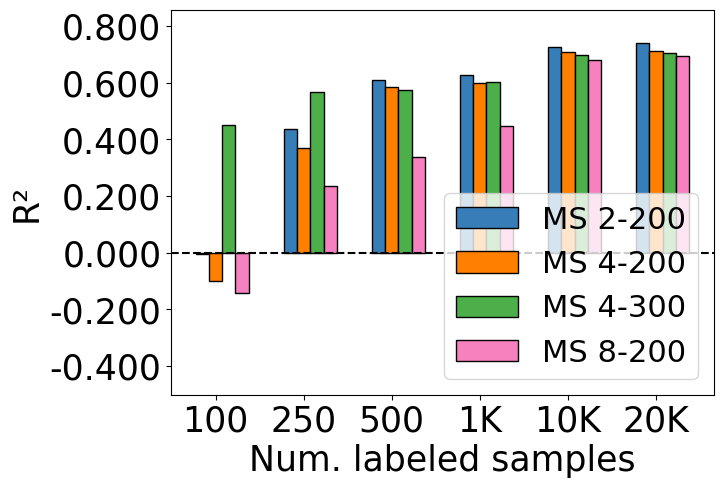

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

color_palate1 = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']
color_palate2 = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'] 

baseline_prefix_str_arr = ['baseline_1layer_MS4-200/s3l_'] * 4
#results_prefix_str_arr = ['FP2_SP_1layer_unfrozen/s3l_', 'FP3_SP_1layer_unfrozen/s3l_', 
#                          'FP4_SP_1layer_unfrozen/s3l_', 'FP5_SP_1layer_unfrozen/s3l_']
#results_prefix_str_arr = ['FP8_SP_1layer_unfrozen/s3l_', 'FP2_SP_1layer_unfrozen/s3l_', 
#                          'FP7_SP_1layer_unfrozen/s3l_', 'FP6_SP_1layer_unfrozen/s3l_']
results_prefix_str_arr = ['baseline_1layer_MS2-200/s3l_', 'baseline_1layer_MS4-200/s3l_', 
                          'baseline_1layer_MS4-300/s3l_', 'baseline_1layer_MS8-200/s3l_']

#plt_str = 'dae_r2_gainz_varyPD_MS4-200_'
#plt_str = 'dae_r2_varyModelSize_PD1_'
plt_str = 'baselines_dae_r2_varyModelSize_'

plot_struct = {}

# Location of the results csv files
for baseline_prefix_str, results_prefix_str in zip(baseline_prefix_str_arr, results_prefix_str_arr):
    print(baseline_prefix_str, results_prefix_str)
    
    model = 'dae'
    
    num_samples_list = ['100', '250', '500', '1K', '10K', '20K']
    tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
    print(len(tasks))
    
    # Read all the results
    results = {}
    results_ff = pd.read_csv(results_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    i_start = 0
    for samp in num_samples_list:
        results[samp] = results_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)
    
    # Read all the baselines
    baseline = {}
    baseline_ff = pd.read_csv(baseline_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    i_start = 0
    for samp in num_samples_list:
        baseline[samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)
            
    # For each error metric type 
    # for each num of samples 
    #gainz_plot_array = {task: None for task in tasks}
    plot_array = np.zeros((len(tasks), len(num_samples_list)))
    
    
    for n, num_samp in enumerate(num_samples_list):
        
        # create 3 err metric dataframnes 
        err_r2 = arr = np.zeros(len(tasks))
        err_mape = np.zeros(len(tasks))
        err_mae = np.zeros(len(tasks))
        gains_r2 = np.zeros(len(tasks))
        
        err_mae = results[num_samp].iloc[:,1]
        err_mape = results[num_samp].iloc[:,2]
        err_r2 = results[num_samp].iloc[:,3]
        gains_r2 = results[num_samp].iloc[:,3] - baseline[num_samp].iloc[:,3]
    
        # save this into the finaly plotting array 
        plot_array[:,n] = err_r2

    plot_struct[results_prefix_str] = plot_array

font_size=25
y_max = max(max(max(row) for row in two_d_list) for two_d_list in plot_struct.values())
y_min = min([0, min(min(min(row) for row in two_d_list) for two_d_list in plot_struct.values())])
print(y_min, y_max)

for t, task in enumerate(tasks):
    # Fix the number of decimals in the y-tick labels (2 decimal places in this case)
    plt.figure(figsize=(7, 5))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ind = np.arange(len(num_samples_list))  
    width = 0.15
    
    for i, results_prefix_str in enumerate(results_prefix_str_arr):
        data = plot_struct[results_prefix_str][t,:]
        plt.bar(ind+width*i, data, width, color = color_palate2[i], edgecolor='black') 
        
    plt.xticks(ind+width, num_samples_list, fontsize=font_size) 
    #plt.legend(['PD 1', 'PD 2', 'PD 3', 'PD 4'], fontsize=22, loc='upper right') 
    plt.legend(['MS 2-200', 'MS 4-200', 'MS 4-300', 'MS 8-200'], fontsize=22, loc='lower right') 
    plt.xlabel('Num. labeled samples', fontsize=font_size)
    #plt.ylabel('Pretraining gain on R²', fontsize=font_size)
    plt.ylabel('R²', fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim([y_min, y_max])
    plt.axhline(y=0, color='black', linestyle='--')
    plt.savefig('plots/'+plt_str+task+'.pdf', bbox_inches='tight')
    plt.show()

    

# Compare approaches 

5
5
5
-0.33399999999999996 0.45299999999999996


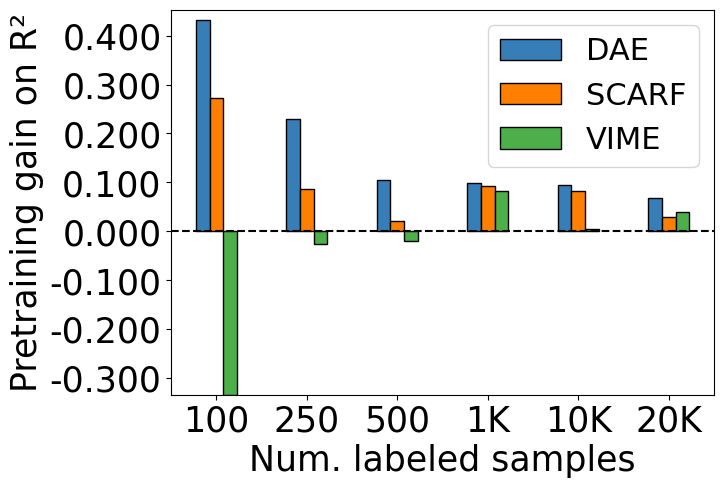

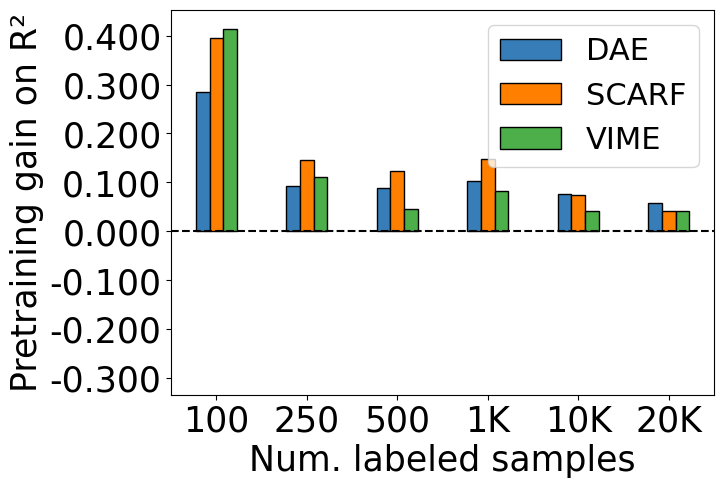

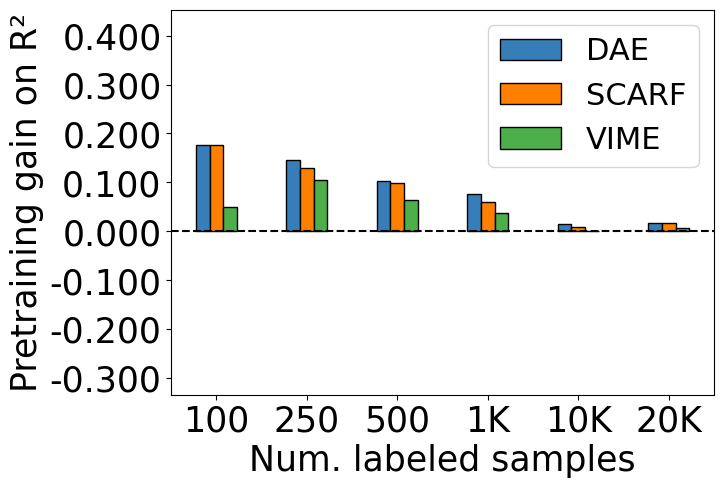

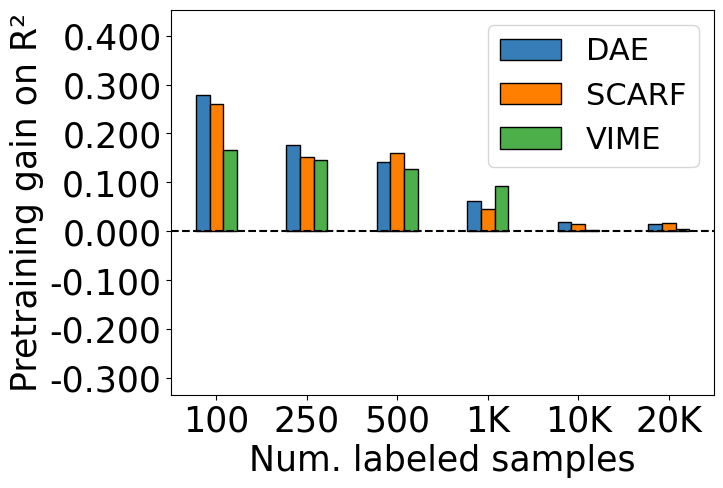

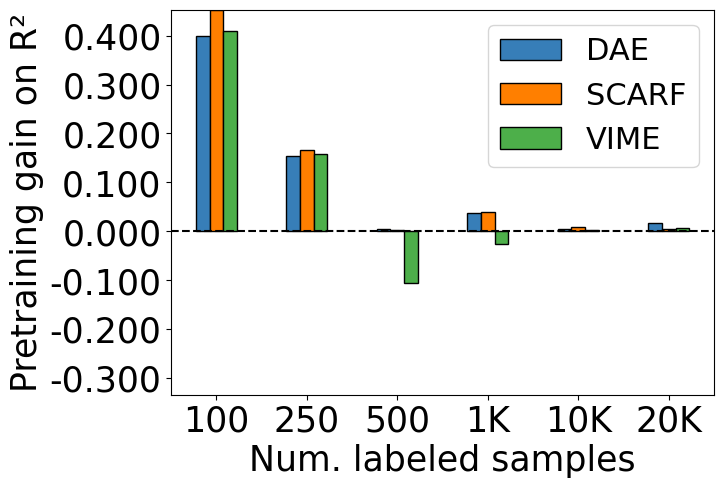

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

color_palate1 = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']
color_palate2 = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'] 

baseline_model = 'baseline_1layer_MS4-200/s3l_'
results_model = 'FP2_SP_1layer_unfrozen/s3l_'

plt_str = 'r2_gains_varyPretraintype_PD1_MS2-400_'

plot_struct = {}

models = ['dae', 'scarf', 'vime']

for model in models:
    
    num_samples_list = ['100', '250', '500', '1K', '10K', '20K']
    tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
    print(len(tasks))
    
    # Read all the results
    results = {} #key is num of samples
    results_ff = pd.read_csv(results_model+model+'_test_results.csv', delimiter=",", header=None)
    i_start = 0
    for samp in num_samples_list:
        results[samp] = results_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)
    
    # Read all the baselines
    baseline = {}
    baseline_ff = pd.read_csv(baseline_model+model+'_test_results.csv', delimiter=",", header=None)
    i_start = 0
    for samp in num_samples_list:
        baseline[samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)
            
    # For each error metric type 
    # for each num of samples 
    #gainz_plot_array = {task: None for task in tasks}
    plot_array = np.zeros((len(tasks), len(num_samples_list)))
    
    
    for n, num_samp in enumerate(num_samples_list):
        
        # create 3 err metric dataframnes 
        err_r2 = arr = np.zeros(len(tasks))
        err_mape = np.zeros(len(tasks))
        err_mae = np.zeros(len(tasks))
        gains_r2 = np.zeros(len(tasks))
        
        err_mae = results[num_samp].iloc[:,1]
        err_mape = results[num_samp].iloc[:,2]
        err_r2 = results[num_samp].iloc[:,3]
        gains_r2 = results[num_samp].iloc[:,3] - baseline[num_samp].iloc[:,3]
    
        # save this into the finaly plotting array 
        plot_array[:,n] = gains_r2

    plot_struct[model] = plot_array





font_size=25
y_max = max(max(max(row) for row in two_d_list) for two_d_list in plot_struct.values())
y_min = min([0, min(min(min(row) for row in two_d_list) for two_d_list in plot_struct.values())])
print(y_min, y_max)

for t, task in enumerate(tasks):
    # Fix the number of decimals in the y-tick labels (2 decimal places in this case)
    plt.figure(figsize=(7, 5))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ind = np.arange(len(num_samples_list))  
    width = 0.15
    
    for i, model in enumerate(models):
        data = plot_struct[model][t,:]
        plt.bar(ind+width*i, data, width, color = color_palate2[i], edgecolor='black') 
        
    plt.xticks(ind+width, num_samples_list, fontsize=font_size) 
    #plt.legend(['PD 1', 'PD 2', 'PD 3', 'PD 4'], fontsize=font_size, loc='lower right') 
    #plt.legend(['MS 4-200', 'MS 4-300', 'MS 8-200'], fontsize=font_size, loc='lower right') 
    plt.legend(['DAE', 'SCARF', 'VIME'], fontsize=22, loc='upper right') 
    #plt.ylim(bottom=0)
    plt.xlabel('Num. labeled samples', fontsize=font_size)
    plt.ylabel('Pretraining gain on R²', fontsize=font_size)
    #plt.ylabel('R²', fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim([y_min, y_max])
    plt.axhline(y=0, color='black', linestyle='--')
    plt.savefig('plots/'+plt_str+task+'.pdf', bbox_inches='tight')
    plt.show()

    

In [3]:
import pickle
print(pickle.format_version)

4.0
